In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("cgpa_iq_placement_dataset.csv")

In [ ]:
df.head()

,CGPA,IQ,Placement
0,2.75,142,0
1,3.90,96,1
2,3.46,112,1
3,3.20,108,1
4,2.31,92,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       500 non-null    float64
 1   IQ         500 non-null    int64  
 2   Placement  500 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


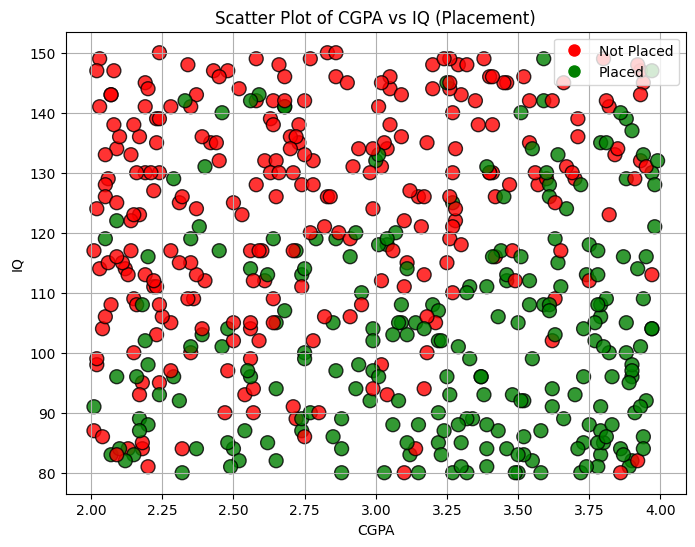

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))

# Color based on placement
colors = ['red' if placed == 0 else 'green' for placed in df['Placement']]

# Plot CGPA vs IQ
plt.scatter(df['CGPA'], df['IQ'], c=colors, s=100, edgecolor='black', alpha=0.8)

# Labels and title
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ (Placement)')

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Not Placed', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Placed', markerfacecolor='green', markersize=10)
]
plt.legend(handles=legend_elements)

plt.grid(True)
plt.show()


In [ ]:


from sklearn.linear_model import Perceptron

# Features and label
X = df[['CGPA', 'IQ']]
y = df['Placement']


In [ ]:
# Train perceptron model
model = Perceptron()
model.fit(X, y)


Perceptron()

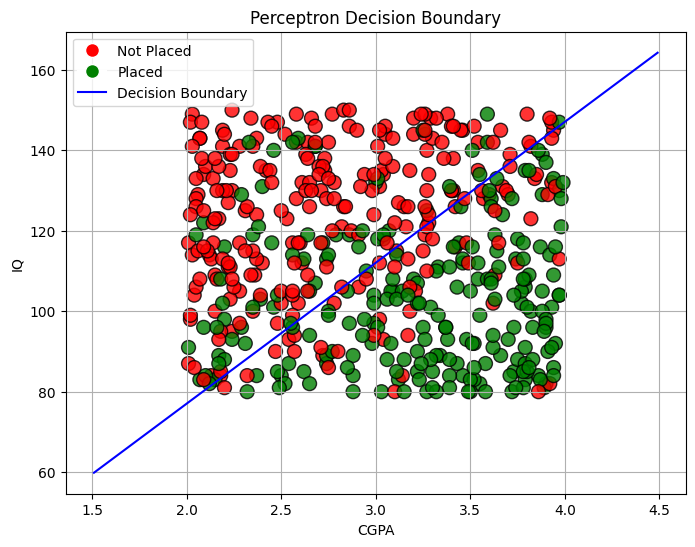

In [ ]:
# Plot setup
plt.figure(figsize=(8, 6))

# Color code by Placement
colors = ['red' if label == 0 else 'green' for label in y]
plt.scatter(X['CGPA'], X['IQ'], c=colors, edgecolor='black', s=100, alpha=0.8)

# Decision boundary
x_vals = np.linspace(X['CGPA'].min()-0.5, X['CGPA'].max()+0.5, 100)
coef = model.coef_[0]
intercept = model.intercept_

# Compute y = mx + b
y_vals = -(coef[0] * x_vals + intercept) / coef[1]

# Plot boundary line
plt.plot(x_vals, y_vals, label="Decision Boundary", color="blue")

# Labels
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Perceptron Decision Boundary')

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Not Placed', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Placed', markerfacecolor='green', markersize=10),
    Line2D([0], [0], color='blue', label='Decision Boundary')
]
plt.legend(handles=legend_elements)

plt.grid(True)
plt.show()


#ANN

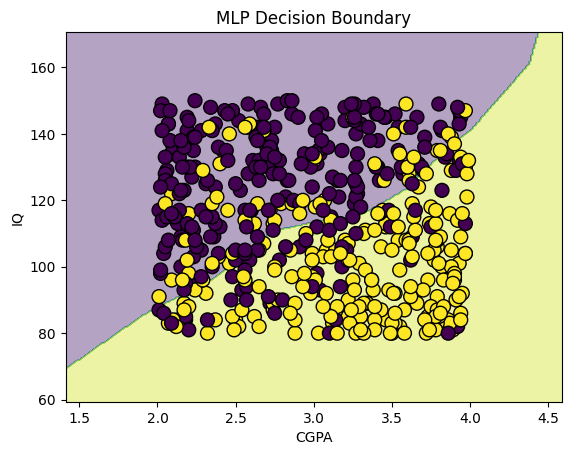

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mlp = MLPClassifier(hidden_layer_sizes=(5,10,20,40,50), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_scaled, y)

def plot_decision_boundary(model, scaler, X, y):
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # To plot on original scale, invert transform the meshgrid points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_orig = scaler.inverse_transform(mesh_points)

    plt.contourf(mesh_points_orig[:, 0].reshape(xx.shape),
                 mesh_points_orig[:, 1].reshape(yy.shape),
                 Z, alpha=.4)
    plt.scatter(X['CGPA'], X['IQ'], c=y, s=100, edgecolors='k')
    plt.xlabel('CGPA')
    plt.ylabel('IQ')
    plt.title('MLP Decision Boundary')
    plt.show()

plot_decision_boundary(mlp, scaler, X, y)
